<a href="https://colab.research.google.com/github/yazeedmshayekh2/ShAi_Training/blob/main/task_9_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [33]:
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

#### peek at one digit

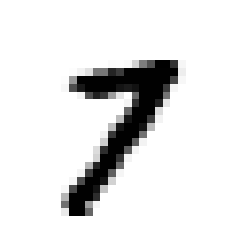

In [10]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = np.array(X)[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
import numpy as np 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = np.array(X_train)[shuffle_index], np.array(y_train)[shuffle_index]

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [13]:
# CODE HERE
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance 

In [15]:
# CODE HERE
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-33506.85009602, -28509.10812445, -18120.25914177,
         -9478.13332556, -17579.77485708, -17841.22020359,
        -54225.99263917,   8654.14872903,  -5276.98737799,
         -5608.78115141]])

#### find highest score 

In [16]:
# CODE HERE
np.argmax(some_digit_scores)

7

#### list the target classes

In [17]:
# CODE HERE
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

#### Find the the target class for 7

In [19]:
# CODE HERE
# if you got stuck use GOOGLE
sgd_clf.classes_[7]

'7'

#### Force ScikitLearn to use one-versus-one

In [20]:
from sklearn.multiclass import OneVsOneClassifier

In [22]:
# CODE HERE
ovo_clf = OneVsOneClassifier(sgd_clf)

ovo_clf.fit(X_train, y_train)

ovo_clf.predict([some_digit])

array(['7'], dtype=object)

#### find how many classifier OvO used

In [23]:
# CODE HERE
len(ovo_clf.estimators_)

45

#### Train  RandomForestClassifier 

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [25]:
# CODE HERE
forest_clf.fit(X_train, y_train)

forest_clf.predict([some_digit])

array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [26]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

#### Find accurcy using cross validation score ()

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# CODE HERE
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96405, 0.965  , 0.96765])

#### to get better accurcy try scaling input

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# CODE HERE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([0.90425, 0.90235, 0.89945])

## Error Analysis

#### Take a look at the confusion matrix

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [32]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([[5608,    0,   16,    6,    9,   44,   33,    5,  201,    1],
       [   0, 6433,   41,   23,    3,   40,    5,   10,  175,   12],
       [  31,   26, 5244,   94,   72,   23,   80,   36,  341,   11],
       [  24,   24,  115, 5259,    0,  207,   28,   46,  360,   68],
       [  10,   15,   43,   13, 5228,    8,   42,   21,  290,  172],
       [  28,   16,   24,  154,   52, 4490,   80,   19,  491,   67],
       [  28,   17,   47,    2,   45,   97, 5542,    8,  132,    0],
       [  20,   12,   52,   28,   47,   11,    4, 5719,  156,  216],
       [  16,   65,   44,  102,    2,  121,   28,    7, 5422,   44],
       [  26,   20,   28,   63,  120,   32,    1,  175,  308, 5176]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

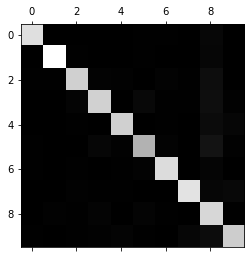

In [34]:
# CODE HERE
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [35]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

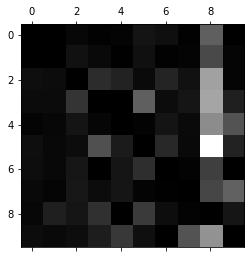

In [36]:
# CODE HERE
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [37]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

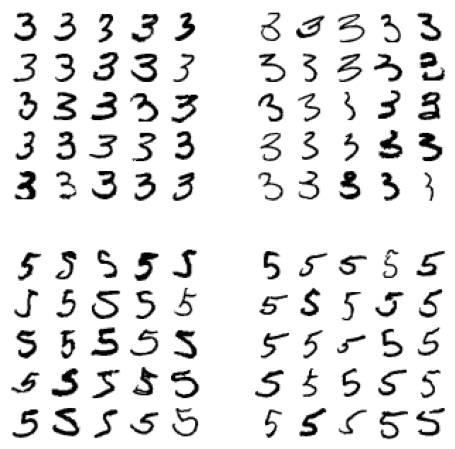

In [38]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [39]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [40]:
# CODE HERE
knn_clf.predict([some_digit])

array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [41]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

#### Let’s take a peek at an image from the test set

In [82]:
# CODE HERE
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

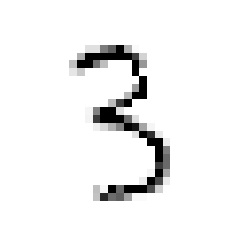

In [97]:
some_index = X_test_mod.iloc[[np.random.randint(0, 783)]]
clean_digit = knn_clf.predict(some_index)
plot_digits(clean_digit[:25])

# Congrats you've finished your first classification Project🥳 !
# #shAI_Club